# 1 安装包

pip install pandas matplotlib numpy cython

pip install pystan

先安装：http://landinghub.visualstudio.com/visual-cpp-build-tools

pip install fbprophet

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
? Prophet

# 2 导入数据

In [2]:
df = pd.read_csv('AirPassengers.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.head(2)

,DATE,AIR
0,1949-01-01,112
1,1949-02-01,118


In [3]:
df.dtypes

DATE    datetime64[ns]
AIR              int64
dtype: object

In [4]:
df['DATE'] = pd.DatetimeIndex(df['DATE'])
df.dtypes

DATE    datetime64[ns]
AIR              int64
dtype: object

In [5]:
df = df.rename(columns={'DATE': 'ds',
                        'AIR': 'y'})
df.head(2)

,ds,y
0,1949-01-01,112
1,1949-02-01,118


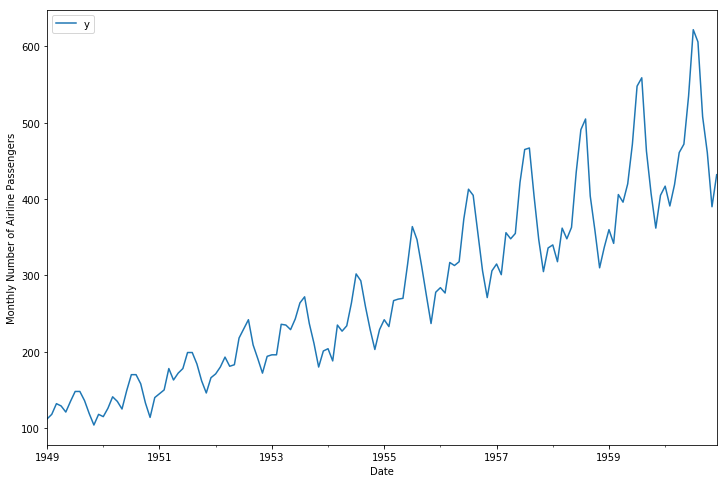

In [6]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

In [7]:
# 设置趋势的形式和预测值的置信区间为95% 
my_model = Prophet(growth='linear',interval_width=0.95)
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

,ds,yhat,yhat_lower,yhat_upper
178,1963-11-01,535.335567,491.392914,579.711918
179,1963-12-01,564.953015,517.911649,607.514404


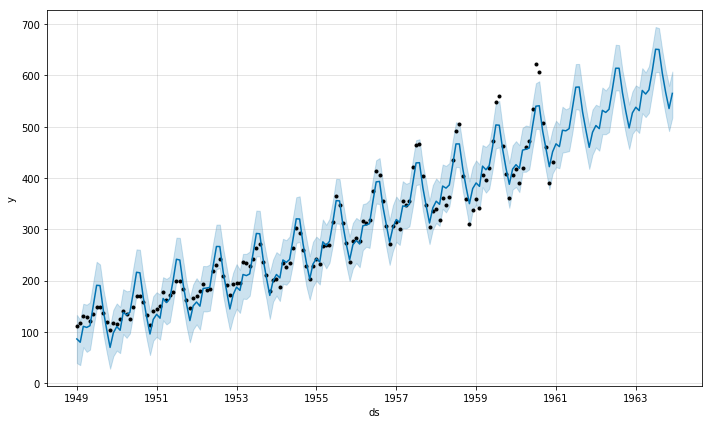

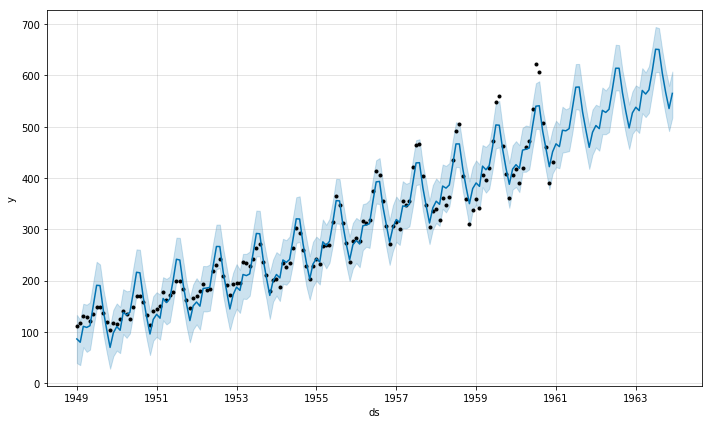

In [9]:
my_model.plot(forecast,uncertainty=True)

In [28]:
?my_model.plot

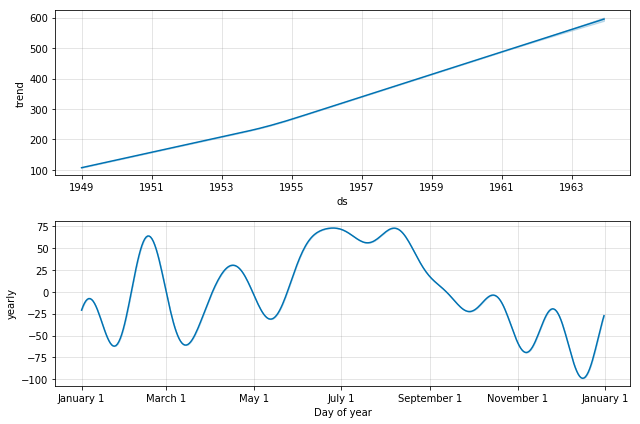

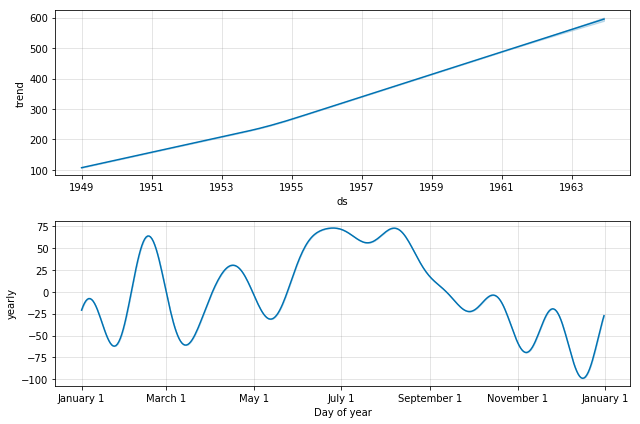

In [15]:
my_model.plot_components(forecast)

## 乘法模型的实现

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


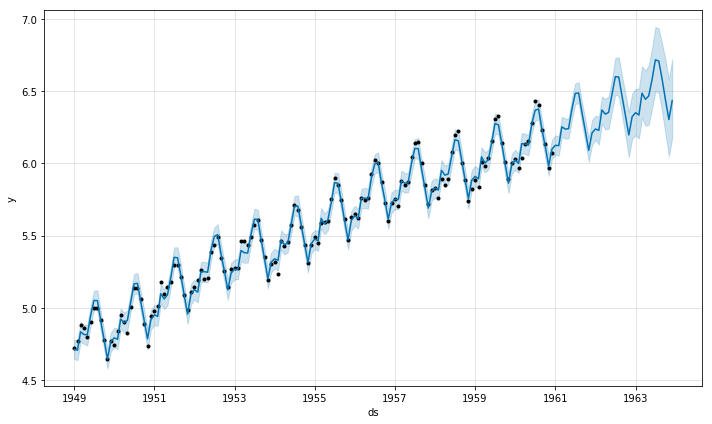

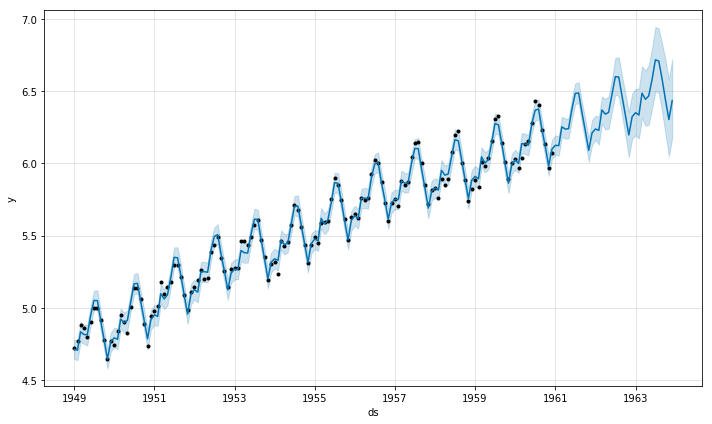

In [10]:
import numpy as np
df['y'] = np.log(df['y'])
my_model = Prophet(growth='linear',interval_width=0.95)
my_model.fit(df)
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)
my_model.plot(forecast,uncertainty=True)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


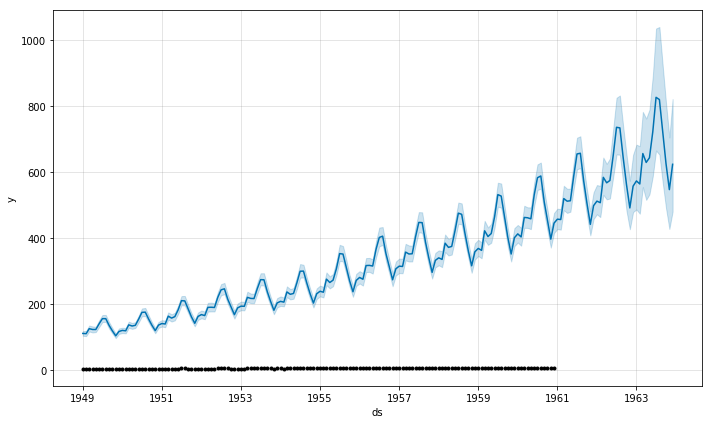

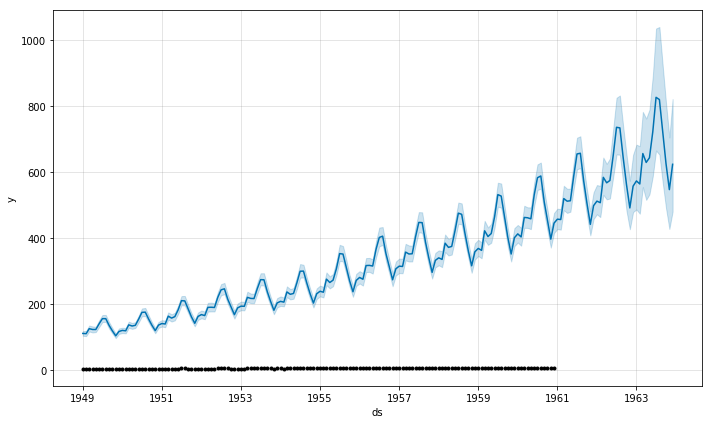

In [16]:
import math
my_model = Prophet(growth='linear',interval_width=0.95)
my_model.fit(df)
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
forecast = my_model.predict(future_dates)
forecast['yhat']=np.power(math.e, forecast['yhat'])
forecast['yhat_lower']=np.power(math.e, forecast['yhat_lower'])
forecast['yhat_upper']=np.power(math.e, forecast['yhat_upper'])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)
my_model.plot(forecast,uncertainty=True)

In [12]:
forecast.tail(2)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
178,1963-11-01,6.524702,6.288208,6.752522,425.981919,689.523109,-0.221110,-0.221110,-0.221110,-0.221110,-0.221110,-0.221110,-0.221110,-0.221110,-0.221110,546.531766
179,1963-12-01,6.533755,6.289148,6.775282,484.971519,807.057256,-0.099066,-0.099066,-0.099066,-0.099066,-0.099066,-0.099066,-0.099066,-0.099066,-0.099066,623.088681
